# Project: Investigate a Dataset - [No Show Appointment]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The dataset is a record of patients indicating if they made their hospital appoinment or missed it. 
- 1 PatienID---Identification of a patient
- 2 AppointmentID--- Appointment identification number
- 3 Gender---Displays the gender of the patient
- 4 ScheduledDay---Displays the date on which appointmnet was scheduled
- 5 AppointmentDay---Shows the date of the appointment
- 6 Neighbourhood---Indicates the location of the hospital
- 7 Scholarship ---Indicates if the patient is on Brazil welfare programme
- 8 Hipertension--- Shows if the patient has hypertension
- 9 Diabetes ---Shows if the patient has diabetes
- 10 Alcoholism ---Indicates if the patient is an alcoholic
- 11 Handcap ---Indicates if the number of disability a patient has
- 12 SMS_received ---Shows if message is sent to the patient
- 13 No-show -- It says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up

### Question(s) for Analysis
- 1 How relevant is the waiting days before appointment?
- 2 What age group is more commited to their medical appointments?


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv("Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

- There are columns that were wrongly spelt (Hipertension,Handcap)
- inconsistency with Case usage (mix of upper and lower cases)

In [4]:
df.shape

(110527, 14)

In [5]:
df.info() #Checking for missing value by columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
df.duplicated().sum()

0

- There is no null column
- wrong data type for the date columns( ScheduledDay and AppointmentDay)
- There is no duplicate row

In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


- Age can't be negative , as seen from the case of the minimum age(-1)

In [8]:
df.Age.unique() #unique values in the age column

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

In [9]:
df[df.Age==-1] #checking for number of columns affected in the age

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [10]:
df.nunique() #number of unique values in each column

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

Expected number of unique value in handicap column exceeds 2 (0 & 1)

In [11]:
df.Handcap.unique()

array([0, 1, 2, 3, 4])


### Data Cleaning

In [12]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

- Rename columns appropriately
- Fix the row with the negative age
- Convert affected columns to the appropriate datatype
- Convert PatientsId and AppointmentId to string from Float and int respectively
- Fix values in Handcap column


<h3>Rename columns appropriately

In [13]:
x = []
for i in df.columns:
    x.append(i.lower())
df.columns = x
df.columns                 #converts all column name to lower case

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no-show'],
      dtype='object')

In [14]:
df.rename(columns={"hipertension":"hypertension","handcap":"handicap","no-show":"no_show"}, inplace=True)

<h3>Removes the row with the negative age

In [15]:
df.drop([99832], axis=0, inplace= True) #dropped the row using the index of the affected row

In [16]:
df.reset_index(drop=True, inplace= True) #resets the index to avoid future index complication

In [17]:
df.shape

(110526, 14)

<h3>Convert affected columns to the appropriate datatype

In [18]:
df["appointmentday"] = pd.to_datetime(df["appointmentday"]).dt.date #convert to datetime
df["scheduledday"] = pd.to_datetime(df["scheduledday"]).dt.date #convert to datetime
df["patientid"] = df["patientid"].astype(str) #convert to type object
df["appointmentid"] = df["appointmentid"].astype(str) #convert to type object

<h3>Fix values in Handcap column

In [19]:
df.handicap.unique()

array([0, 1, 2, 3, 4])

In [20]:
def fill(x):
    if x >0:
        return 1
    else:
        return 0
df["handicap"] = df.handicap.apply(fill) 
"""
The function would return 1 to indicate 
if a person is an handicap(instead of number of disabilities) or 0 if the person is not
"""

'\nThe function would return 1 to indicate \nif a person is an handicap(instead of number of disabilities) or 0 if the person is not\n'

In [21]:
df["handicap"].unique()

array([0, 1])

<a id='eda'></a>
## Exploratory Data Analysis

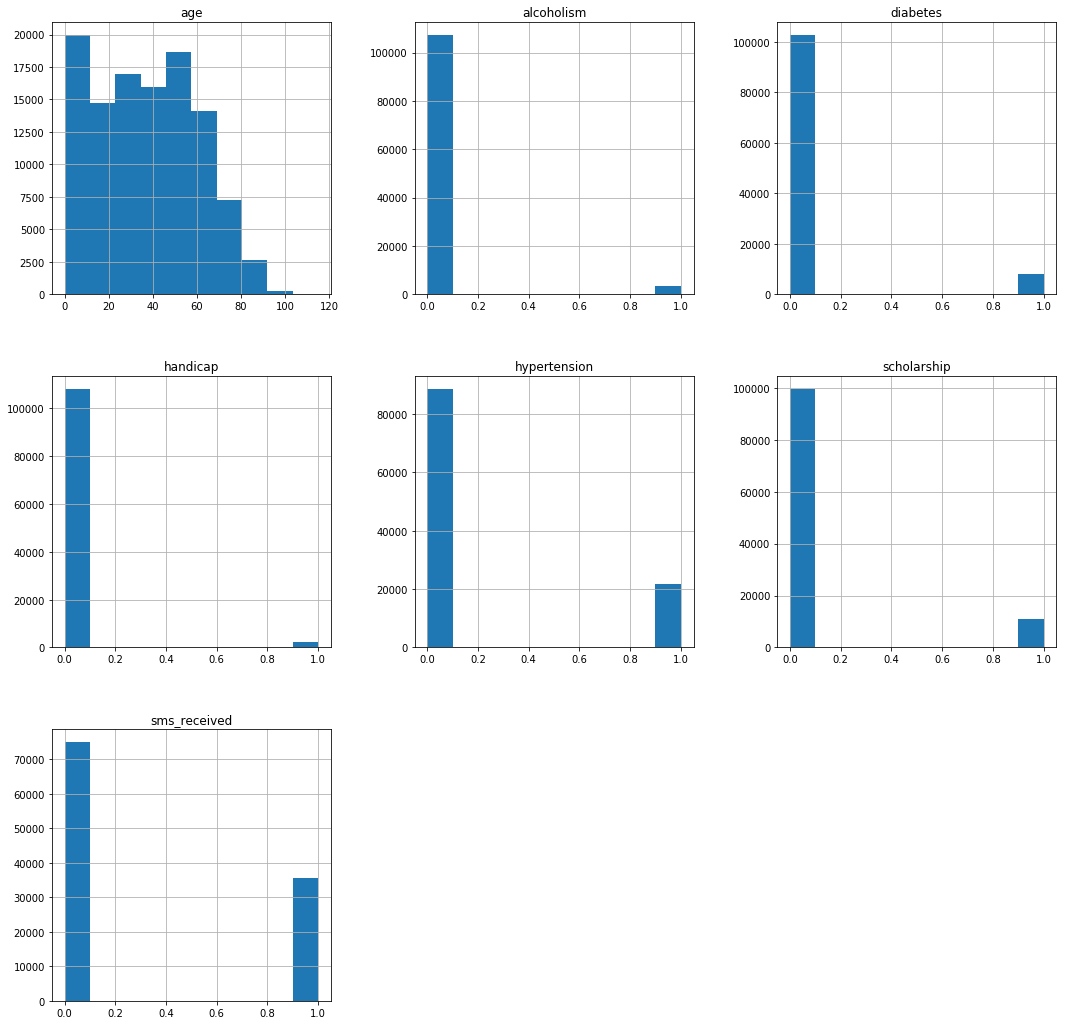

In [22]:
df.hist(figsize=(18,18)); # distribution of Data in columns

In [23]:
show = df[df["no_show"] == "No"] # Dataframe of patients that showed up
noshow = df[df["no_show"]=="Yes"] #Dataframe of Patients that didn't show up

In [24]:
len(show) + len(noshow)== len(df) #checking if any data is left out

True

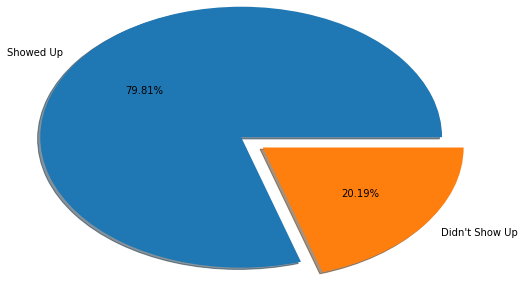

In [25]:
val = [len(show), len(noshow)] 
label = ["Showed Up", "Didn't Show Up"]
plt.pie(val,radius=1.5,shadow=True ,autopct='%0.2f%%',labels = label,explode=(0,0.2));

### Research Question 1 (how relevant is the waiting days before appointment?)

In [26]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,29872499824296.0,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438.0,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951.0,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174.0,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183.0,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [27]:
df["interval"] = df.appointmentday - df.scheduledday #creates a column that accounts for

In [28]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,interval
0,29872499824296.0,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0 days
1,558997776694438.0,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0 days
2,4262962299951.0,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0 days
3,867951213174.0,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0 days
4,8841186448183.0,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0 days


In [29]:
df["interval"] = df["interval"].apply(lambda x: str(x).split(" ")[0] )

In [30]:
df["interval"] = df["interval"].astype(int)

In [31]:
df["interval"].unique()

array([  0,   2,   3,   1,   4,   9,  29,  10,  23,  11,  18,  17,  14,
        28,  24,  21,  15,  16,  22,  43,  30,  31,  42,  32,  56,  45,
        46,  39,  37,  38,  44,  50,  60,  52,  53,  65,  67,  91,  66,
        84,  78,  87, 115, 109,  63,  70,  72,  57,  58,  51,  59,  41,
        49,  73,  64,  20,  33,  34,   6,  35,  36,  12,  13,  40,  47,
         8,   5,   7,  25,  26,  48,  27,  19,  61,  55,  62, 176,  54,
        77,  69,  83,  76,  89,  81, 103,  79,  68,  75,  85, 112,  -1,
        80,  86,  98,  94, 142, 155, 162, 169, 104, 133, 125,  96,  88,
        90, 151, 126, 127, 111, 119,  74,  71,  82, 108, 110, 102, 122,
       101, 105,  92,  97,  93, 107,  95,  -6, 139, 132, 179, 117, 146,
       123])

- There are negative number of days in the interval which indicates an error in input

In [32]:
df[df["interval"]== -6]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,interval
71533,998231581612122.0,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6


In [33]:
df[df["interval"]== -1]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,interval
27033,7839272661752.0,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1
55226,7896293967868.0,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1
64175,24252258389979.0,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1
72362,3787481966821.0,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1


In [34]:
df1= df.drop([71533,27033,55226,64175,72362],axis=0) #dropping rows affected rows by index

In [35]:
avg = df1.groupby("no_show")["interval"].mean()  
avg

no_show
No      8.754759
Yes    15.835484
Name: interval, dtype: float64

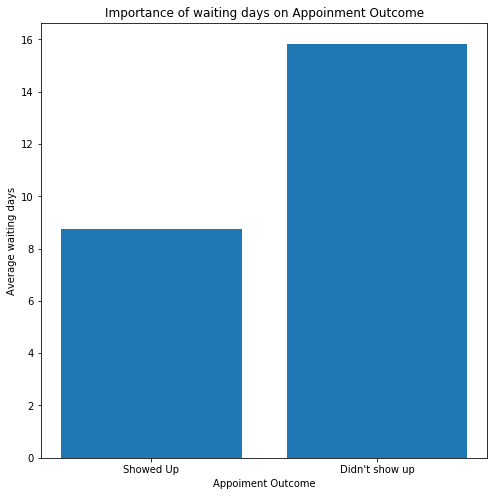

In [36]:
plt.figure(figsize=(8,8))
plt.bar([1,2],avg , tick_label=["Showed Up","Didn't show up"])
plt.title("Importance of waiting days on Appoinment Outcome")
plt.xlabel("Appoiment Outcome")
plt.ylabel("Average waiting days");

- The average number of days before the appointment for people that showed up is approximately 9 days
- The average number of days before the appointment for people that didn't show up is approximately 16 days

In [37]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

### Research Question 2  (What age group is more commited to their medical appointments?)

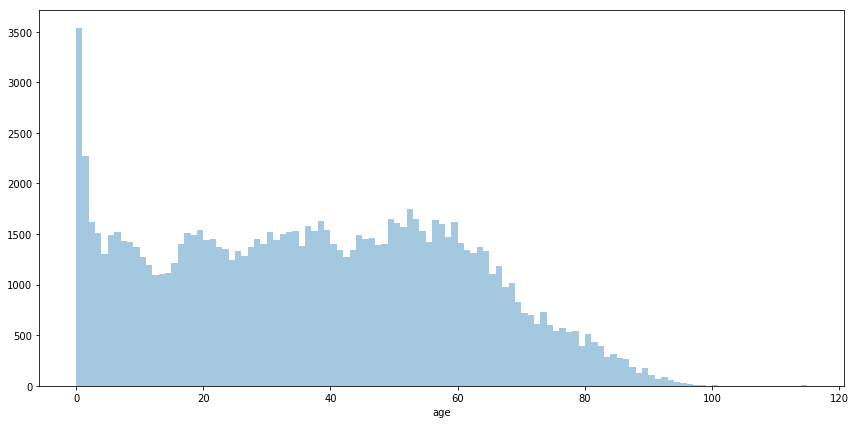

In [38]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
plt.figure(figsize=(12, 6))
sns.distplot(df.age, bins=df.age.max(), kde=False)
plt.tight_layout()

In [39]:
bin = [-1,18,35,65,118]
label = ["young","young_adult","adult","old"]
df["age_bracket"] = pd.cut(df.age,bins=bin,labels=label) #Adds new column to the dataframe categorizing age

In [40]:
df["age_bracket"].unique()

[adult, young, old, young_adult]
Categories (4, object): [young < young_adult < adult < old]

In [41]:
age_cal =df.groupby("age_bracket")["no_show"].value_counts().unstack()
age_cal

no_show,No,Yes
age_bracket,,
young,22519,6347
young_adult,18384,5753
adult,36069,8153
old,11235,2066


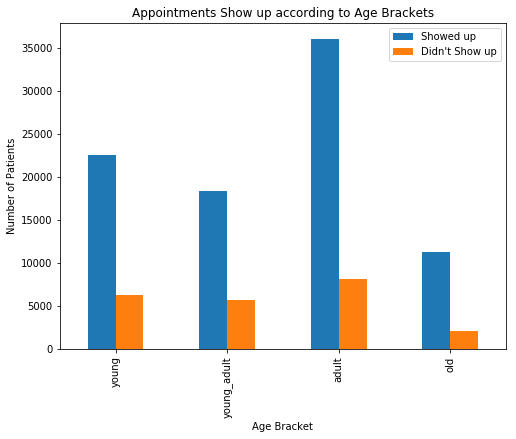

In [42]:
age_cal.plot(kind="bar", figsize=(8,6))
plt.title("Appointments Show up according to Age Brackets")
plt.xlabel("Age Bracket")
plt.ylabel("Number of Patients")
plt.legend(["Showed up","Didn't Show up"]);

In [43]:
age_cal.columns = ["No","Yes"]
age_cal["%show_up"] = (age_cal.No/(age_cal.No + age_cal.Yes)) *100 # calculates % of patients that showed up
age_cal

,No,Yes,%show_up
age_bracket,,,
young,22519,6347,78.012194
young_adult,18384,5753,76.165224
adult,36069,8153,81.563475
old,11235,2066,84.467333


Text(0,0.5,'Commitment (%)')

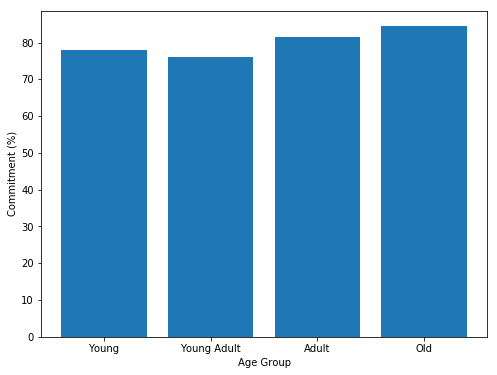

In [44]:
plt.figure(figsize=(8,6))
plt.bar([1,2,3,4],age_cal["%show_up"],tick_label=["Young","Young Adult","Adult","Old"])
plt.xlabel("Age Group")
plt.ylabel("Commitment (%)")

commitment of each age group
- Young (0 -17 yrs) = 78.01%
- Young adult (18 - 34 yrs) = 76.17%
- Adult (35 - 64 yrs) = 81.56%  
- Old (65 yrs and above) = 84.47%

<a id='conclusions'></a>
<h2> Conclusions

- There are 110527 Appointment records
- 79.81% showed up for their appointments while 20.19% didn't show up
- The number of days between when an appointment is scheduled and the appointment day is important in the outcome of the appointment
- The sooner the appoinment day, the higher the chances of a patient showing up for their appointment
- With 84.4% commitment rate, Old people (65 years and older) are more committed to their medical appointment
- Young adult (between 18 and 35 years of age) are the least committed to their Medical appointment

<h2>Limitations

- The handicap Column could be more meaning if the type of disabilities are clearly stated instead of number of disability
- The SMS column did not state when the reminder was sent

In [45]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0